# <center><font color='MediumSeaGreen'> _Módulo Machine Learning G45_</font>
# <center><font color='MediumSeaGreen'> Desafío guiado -  Boosting Classifiers </font>
## <center> _Algoritmo de ensanmble (Parte 2)_ 
    
### <center><b> Bárbara Pérez </b><center>

____________

## <font color='MediumSeaGreen'>Requerimientos</font>

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañía de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañía de telecomunicaciones <span style='background:gainsboro'><font color='dimgray'>churn</font></span>. Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

## <font color='dimgray'>**Lista de atributos:**</font></span>

<font color='MediumSeaGreen'>●</font> **State:** Estado de Estados Unidos

<font color='MediumSeaGreen'>●</font> **Account Length:** Tiempo en que la cuenta ha sido activada.

<font color='MediumSeaGreen'>●</font> **Area Code:** Código de área.

<font color='MediumSeaGreen'>●</font> **International plan:** Plan internacional activado.

<font color='MediumSeaGreen'>●</font> **Voice mail plan:** Plan de mensajes de voz activado.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>number_vmail_messages</font></span>: Cantidad de mensajes de voz.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_day_minutes</font></span>: Cantidad de minutos ocupados en la mañana.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_day_calls</font></span>: Cantidad de llamadas realizadas en la mañana.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_day_charge</font></span>: Cobros realizados en la mañana.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_eve_minutes</font></span>: Cantidad de minutos ocupados en la tarde.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_eve_calls</font></span>: Cantidad de llamadas realizadas en la tarde.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_eve_charge</font></span>: Cobros realizados en la tarde.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_night_calls</font></span>: Cantidad de llamadas realizadas en la noche.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>tota_night_minutes</font></span>: Cantidad de minutos ocupados en la noche.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_night_charge</font></span>: Cobros realizados en la noche.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_intl_minutes</font></span>: Cantidad de minutos ocupados en llamadas internacionales.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_intl_calls</font></span>: Cantidad de llamadas internacionales realizadas.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>total_intl_charge</font></span>: Cobros realizados por llamadas internacionales.

<font color='MediumSeaGreen'>●</font> <span style='background:gainsboro'><font color='dimgray'>churn</font></span>: 1 si el cliente se cambió de compañía, 0 de los contrario.

Los datos provienen del paquete <span style='background:gainsboro'><font color='dimgray'>AppliedPreditiveModeling</font></span> de R

__________


## <font color='MediumSeaGreen'>Ejercicio 1: Preprocesamiento</font>

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
* En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    * Para las variables categóricas, recodifíquelas en variables binarias.
    * Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [1]:
#librerías clásicas
import matplotlib.pyplot as plt #version 3.5.2
import pandas as pd  #version 1.4.3
import seaborn as sns  #version 0.11.2
import numpy as np  #version 1.23.0

#eliminamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

#seteamos elementos cosméticos para los gráficos
from matplotlib.gridspec import GridSpec
sns.set_style("darkgrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 20)
plt.rcParams["figure.dpi"] = 100  # resolución gráficos

In [2]:
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')

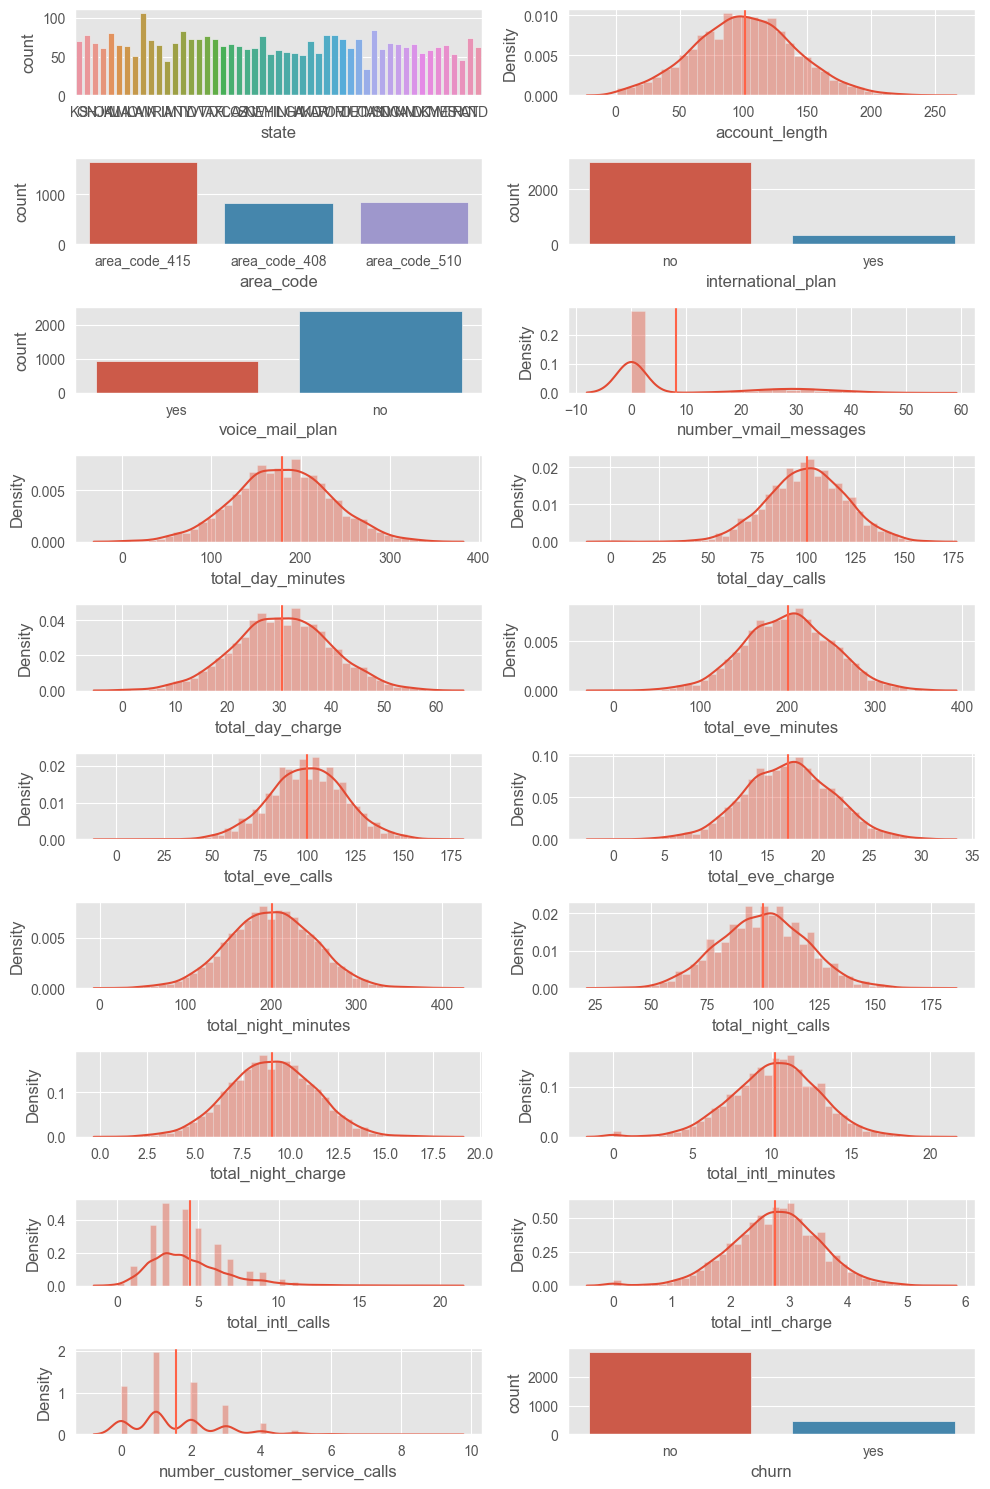

In [3]:
rows = 10
cols = df.shape[1] // rows
plt.figure(figsize=(10, 15))
for index, (colname, serie) in enumerate(df.iteritems()):
    plt.subplot(rows, cols, index + 1)
    if serie.dtype == 'object':
        sns.countplot(serie)
    else:
        sns.distplot(serie)
        plt.axvline(serie.mean(), color='tomato')
    plt.tight_layout()

In [4]:
def preprocess_data(df):
    # temporal copy
    tmp_df = df
    # identify categorical variables to be recoded
    get_categoricals = df.dtypes[np.where(df.dtypes.values == 'object',
    True, False)]
    # for each name
    for i in get_categoricals.index:
        # create a set of dummies
        tmp_dummies = pd.get_dummies(tmp_df[i], drop_first=True,
        prefix=i)
        # drop the original column
        tmp_df = tmp_df.drop(columns = i)
        # concatenate and update tmp dataframe
        tmp_df = pd.concat([tmp_df, tmp_dummies], axis=1)
    # return
    return tmp_df
train_data = preprocess_data(df)
train_data.sample(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
1699,133,0,221.1,133,37.59,160.2,140,13.62,161.8,84,...,0,0,0,0,0,0,0,0,0,0
3224,115,0,226.4,101,38.49,276.8,60,23.53,213.4,82,...,0,0,0,0,0,1,0,0,0,1
1089,85,0,211.5,100,35.96,184.6,88,15.69,164.3,131,...,0,0,0,0,0,0,1,0,0,0
2021,104,26,189.1,112,32.15,178.2,97,15.15,199.3,104,...,0,0,0,0,0,1,0,0,1,0
1364,115,0,245.0,97,41.65,250.7,75,21.31,270.2,124,...,0,0,0,0,0,1,0,0,0,1


_______

## <font color='MediumSeaGreen'>Ejercicio 2: Comparación de AdaBoost y Gradient Boosting</font>

* Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:

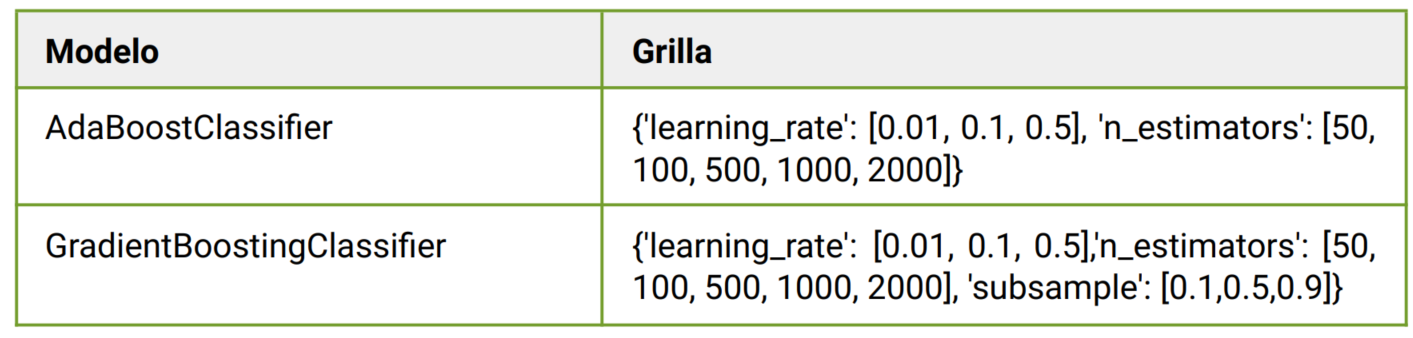

* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [6]:
y = train_data.pop('churn_yes')
# definimos conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(train_data, y, random_state=11238, test_size=.33)

In [7]:
from sklearn.model_selection import GridSearchCV
improve_adaboost = GridSearchCV(AdaBoostClassifier(random_state=11238),
                                {'learning_rate': [0.01, 0.1, 0.5],
                                 'n_estimators': [50, 100, 500, 1000,2000]},cv=5).fit(X_train, y_train)

In [8]:
improve_gboost =GridSearchCV(GradientBoostingClassifier(random_state=11238),
                             {'learning_rate': [0.01, 0.1, 0.5],
                              'n_estimators': [50, 100, 500, 1000,2000],
                              'subsample': [0.1, 0.5, 0.9]},cv=5).fit(X_train, y_train)

In [9]:
def best_hyperparams(model):
    print("Hyperparam combination ", model.best_params_)
    print("Best score: ", model.best_score_)

In [10]:
best_hyperparams(improve_adaboost)
best_hyperparams(improve_gboost)

Hyperparam combination  {'learning_rate': 0.1, 'n_estimators': 1000}
Best score:  0.8786428707577171
Hyperparam combination  {'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9}
Best score:  0.9547687121918921


_______

## <font color='MediumSeaGreen'>Ejercicio 3: Principales factores asociados</font>

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

    
***Tip:*** *Pueden implementar la función <span style='background:gainsboro'><font color='dimgray'>plot_importance</font></span> que se encuentra en la lectura de Bagging y Random Forest*

In [11]:
def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

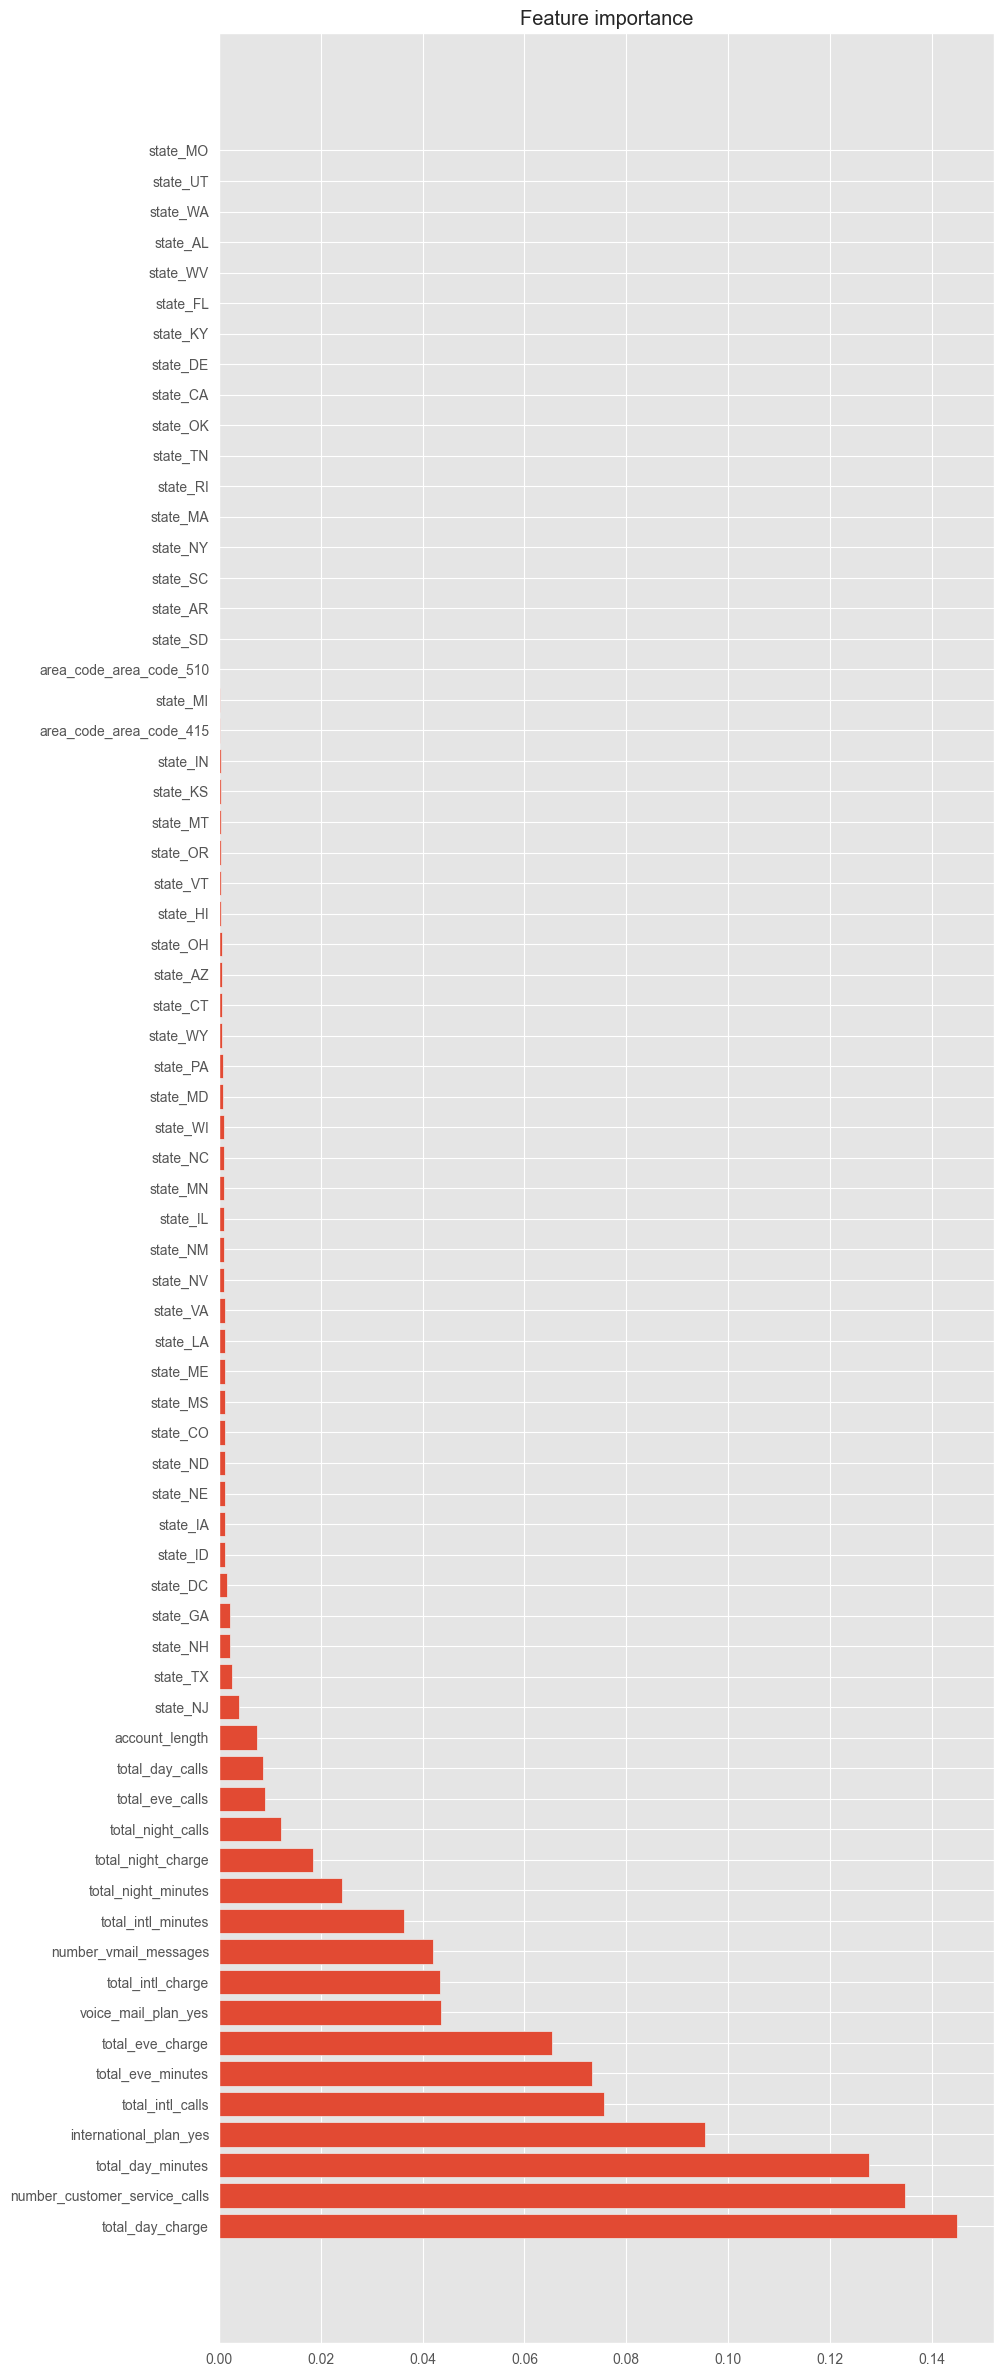

In [12]:
plt.figure(figsize=(10, 30))
plot_importance(improve_gboost.best_estimator_, train_data.columns)

_____________

## <font color='MediumSeaGreen'>Ejercicio 4: Probabilidad de fuga</font>

* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.

* Implemente el modelo predictivo con el archivo <span style='background:gainsboro'><font color='dimgray'>churn_test.csv</font></span>.

* Recuerde que para obtener la probabilidad de clase, debe utilizar la función <span style='background:gainsboro'><font color='dimgray'>predict_proba</font></span> del modelo.

In [13]:
# importamos el nuevo conjunto de dato
test_data = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
# implementamos la función de preprocesamiento de datos
test_data = preprocess_data(test_data)
# definimos el vector objetivo y la matriz de atributos
y = test_data.pop('churn_yes')
# generamos las PREDICCIONES DE PROBABILIDAD
tmp_pr = improve_gboost.best_estimator_.predict_proba(test_data)
# Generamos un nuevo conjunto de datos que contenga todas las variables binarias por estadi
predicted_proba = test_data.filter(regex='state_*', axis=1)
# extraemos la probabilidad de no fuga para cada registro
predicted_proba['pr_0'] = [i[0] for i in tmp_pr]
# extraemos la probabilidad de fuga para cada registro
predicted_proba['pr_1'] = [i[1] for i in tmp_pr]

ValueError: alpha (336.0) is outside 0-1 range

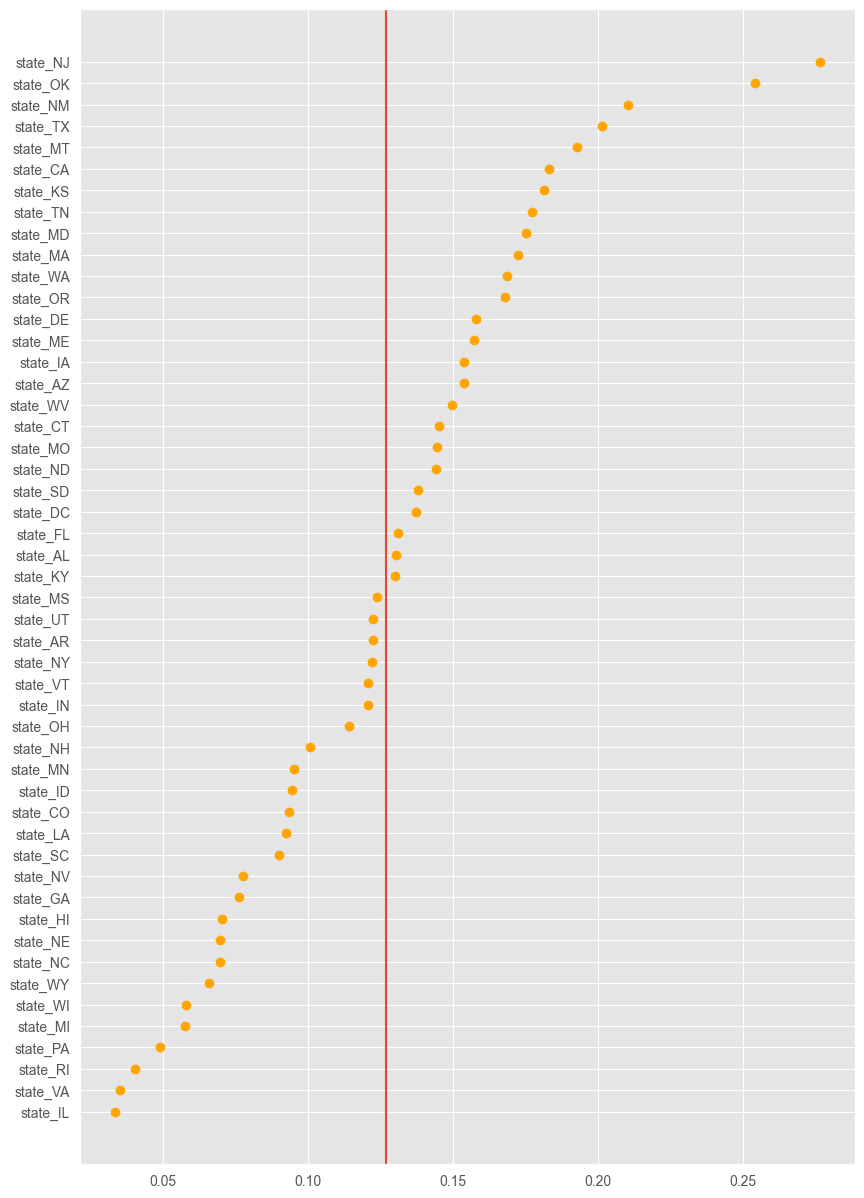

In [15]:
# generamos tres listas vacíos
p0, p1, state = [], [], []
# para cada estado ingresado en el nuevo conjunto de datos
for colname, serie in predicted_proba.loc[:,'state_AL':'state_WY'].iteritems():
    # seleccionamos los registros existentes
    tmp_df = predicted_proba[serie == 1]
    # calculamos la media de no fuga y agregamos a la lista vacía
    p0.append(tmp_df['pr_0'].mean())
    # calculamos la media de fuga y agregamos a la lista vacía
    p1.append(tmp_df['pr_1'].mean())
    # agregamos el nombre del estado
    state.append(colname)
    
# convertimos a dataframe
store_pr = pd.DataFrame({'state': state, 'p0':p0, 'p1':p1}).set_index('state')
# ordenamos los valores de la probabilidad de fuga
var = store_pr['p1'].sort_values()
# graficamos
plt.figure(figsize=(10, 15))
plt.plot(var, var.index, 'o', color='orange')
# agregamos la media general de fuga
plt.axvline(var.mean())
# agregamos intervalos de confianza
for i in [1.68, 1.96]:
    plt.fill_betweenx(var.index, x1= var.mean() - i * np.sqrt(var.var()), x2 = var.mean() + i * np.sqrt(var.var()), alpha = 100/(.5/i))
plt.legend()
plt.title('Probabilidad de fuga de clientes a nivel estatal');
plt.show

_____________